In [34]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import joblib

In [118]:
#train_dir="../input/face_recognition_dataset/Original_Images/Original_Images/"
#train_dir="/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/"
#Unmodified Dataset
#train_dir="input/face_recognition_dataset/Original_Images/Original_Images"
#Modified Dataset
train_dir="input/face_recognition_dataset/Original_Images_more/"

generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 4362 images belonging to 43 classes.


In [119]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

In [125]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics=['binary_accuracy', 'categorical_accuracy'])
    #metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 111, 111, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                      

In [131]:
#history = model.fit(train_ds,epochs= 30, batch_size=32)
history = model.fit(train_ds,epochs= 15, batch_size=32)

Epoch 1/15
137/137 [==============================] - 562s 4s/step - loss: 1.5543 - binary_accuracy: 0.9820 - categorical_accuracy: 0.5360
Epoch 2/15
137/137 [==============================] - 502s 4s/step - loss: 1.1847 - binary_accuracy: 0.9852 - categorical_accuracy: 0.6437
Epoch 3/15
137/137 [==============================] - 502s 4s/step - loss: 0.9521 - binary_accuracy: 0.9878 - categorical_accuracy: 0.7208
Epoch 4/15
137/137 [==============================] - 559s 4s/step - loss: 0.7723 - binary_accuracy: 0.9898 - categorical_accuracy: 0.7740
Epoch 5/15
137/137 [==============================] - 611s 4s/step - loss: 0.5917 - binary_accuracy: 0.9918 - categorical_accuracy: 0.8187
Epoch 6/15
137/137 [==============================] - 622s 5s/step - loss: 0.4236 - binary_accuracy: 0.9942 - categorical_accuracy: 0.8767
Epoch 7/15
137/137 [==============================] - 447s 3s/step - loss: 0.3296 - binary_accuracy: 0.9955 - categorical_accuracy: 0.9072
Epoch 8/15
137/137 [=======

In [132]:
# Saving Model
filename = 'final_model1.hdf5'
joblib.dump(history, filename)
 
# load the model from disk
model_saved = joblib.load(filename)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......batch_normalization
.........vars
............0
............1
............2
............3
......batch_normalization_1
.........vars
............0
............1
............2
............3
......batch_normalization_2
.........vars
............0
............1
............2
............3
......batch_normalization_3
.........vars
............0
............1
............2
............3
......batch_normalization_4
.........vars
............0
............1
............2
............3
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......conv2d_3
.........vars
............0
............1
......conv2d_4
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......flatten
.

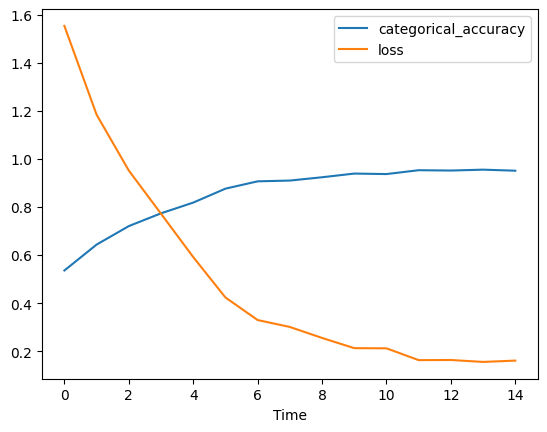

In [135]:
plt.plot(model_saved.history['categorical_accuracy'])
plt.plot(model_saved.history['loss'])
plt.xlabel('Time')
plt.legend(['categorical_accuracy', 'loss'])
plt.show()

In [141]:
from sklearn.metrics import accuracy_score

def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    #plt.imshow(img)
    #plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
    pred = model.predict(images, batch_size=32)
    #print(pred.evaluate(images, batch_size=32))

    # Prediction accuracy
    #--> le pb que j'arrive pas à resoudre est ici
    print("Prediction accuracy:",(100-np.argmax(pred)),"%")

    print("Actual result: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted result: "+classes[np.argmax(pred)])

predict_image("/home/meatisdelicious/DetectionVisage/DetectionVisage/FaceDetectionV4/input/face_recognition_dataset/Original_Images/Original_Images/Brad Pitt/Brad Pitt_105.jpg")

1/1 [==============================] - 0s 96ms/step
Prediction accuracy: 92 %
Actual result: Brad Pitt
Predicted result: Brad Pitt
